<a href="https://colab.research.google.com/github/churry75/tf_tutorial/blob/master/tf_tutorial_10_CNN_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 간단한 CNN 이미지 분류 모델 구현

## 필요한 라이브러리 import

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 데이터셋 로드
- CIFAR-10 데이터셋 로드

In [2]:
(train_sets, valid_sets, test_sets), info = tfds.load(name='cifar10', split=['train[:85%]', 'train[85%:]', 'test'], with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incomplete1KR7MF/cifar10-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incomplete1KR7MF/cifar10-test.tfrecord


Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [24]:
class_names = info.features['label'].names
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [4]:
def preprocessing(item):
    images = item['image']
    images = tf.cast(images, tf.float32) / 255.0
    labels = item['label']
    return images, labels

In [5]:
train_sets = train_sets.map(preprocessing).shuffle(10000).batch(128).prefetch(1)
valid_sets = valid_sets.map(preprocessing).shuffle(10000).batch(128).prefetch(1)
test_sets = test_sets.map(preprocessing).shuffle(10000).batch(128).prefetch(1)

## 모델 생성
- 함수형 API를 사용하여 모델 생성

In [6]:
_input = keras.layers.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(_input)
x = keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
x = keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same')(x)
x = keras.layers.Conv2D(256, (3, 3), (1, 1),
                        padding='same', activation='relu')(x)
x = keras.layers.Conv2D(256, 3,
                        padding='same', activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(units=128, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
_output = keras.layers.Dense(10, activation='softmax')(x)

In [7]:
model = keras.Model(inputs=_input, outputs=_output)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0     

## 모델 컴파일
- 최적화 기법: adam
- 손실함수: 교차 엔트로피



In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 모델 훈련

In [10]:
histo = model.fit(train_sets, validation_data=valid_sets, epochs=100)

Epoch 1/100
333/333 [==============================] - 44s 31ms/step - loss: 2.0762 - accuracy: 0.2016 - val_loss: 1.7383 - val_accuracy: 0.3409
Epoch 2/100
333/333 [==============================] - 9s 25ms/step - loss: 1.6480 - accuracy: 0.3782 - val_loss: 1.4732 - val_accuracy: 0.4776
Epoch 3/100
333/333 [==============================] - 9s 25ms/step - loss: 1.4200 - accuracy: 0.4838 - val_loss: 1.1519 - val_accuracy: 0.5884
Epoch 4/100
333/333 [==============================] - 9s 26ms/step - loss: 1.2335 - accuracy: 0.5640 - val_loss: 1.3116 - val_accuracy: 0.5539
Epoch 5/100
333/333 [==============================] - 9s 26ms/step - loss: 1.0977 - accuracy: 0.6192 - val_loss: 1.0192 - val_accuracy: 0.6331
Epoch 6/100
333/333 [==============================] - 9s 26ms/step - loss: 0.9982 - accuracy: 0.6581 - val_loss: 0.8726 - val_accuracy: 0.6963
Epoch 7/100
333/333 [==============================] - 9s 26ms/step - loss: 0.8849 - accuracy: 0.7014 - val_loss: 0.8295 - val_accuracy

- 훈련 결과 그래프 시각화

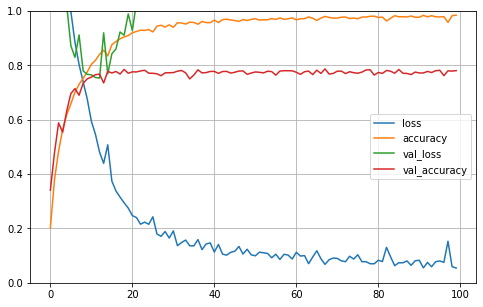

In [13]:
pd.DataFrame(histo.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 모델 평가

In [14]:
test_loss, test_acc = model.evaluate(test_sets)

79/79 [==============================] - 1s 9ms/step - loss: 1.9471 - accuracy: 0.7851


## 새로운 이미지로 모델 예측

In [63]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

Saving airplane.jpg to airplane (3).jpg
Saving dog2.jpg to dog2 (3).jpg
Saving frog.jpg to frog (2).jpg


In [65]:
from IPython.display import Image
from keras.preprocessing import image

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
tf.Tensor(
[0.23196931 0.08533675 0.08533675 0.08533675 0.08533675 0.08533675
 0.08533675 0.08533675 0.08533675 0.08533675], shape=(10,), dtype=float32)
0
airplane
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
tf.Tensor(
[0.08533675 0.08533675 0.08533675 0.08533675 0.08533675 0.23196931
 0.08533675 0.08533675 0.08533675 0.08533675], shape=(10,), dtype=float32)
5
dog
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
tf.Tensor(
[0.08533675 0.08533675 0.08533675 0.23196931 0.08533675 0.08533675
 0.08533675 0.08533675 0.08533675 0.08533675], shape=(10,), dtype=float32)
3
cat


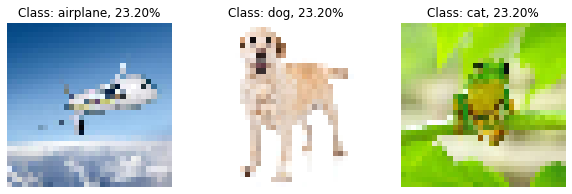

In [99]:
plt.figure(figsize=(10, 10))
index = 0
for _file in uploaded.keys():
    path = '/content/' + _file
    img = image.load_img(path, target_size=(32, 32))

    index += 1
    plt.subplot(1, 3, index)
    plt.imshow(img)
    plt.axis('off')
    
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0)
    
    #images = np.vstack([x])
    
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    print(predictions[0])
    print(score)
    class_pred = np.argmax(predictions[0])
    print(class_pred)
    print(class_names[class_pred])

    plt.title("Class: {}, {:.2f}%".format(class_names[class_pred], 100 * np.max(score)))
plt.show()

## 모델 저장

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [137]:
model_all = 'first_model'
path1 = F"/content/gdrive/My Drive/saved_model/my_first_model/{model_all}"
model.save(path1)
model_name = 'first_model.h5'
path2 = F"/content/gdrive/My Drive/saved_model/my_first_model/{model_name}"
model.save(path2)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/saved_model/my_first_model/first_model/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/saved_model/my_first_model/first_model/assets
